## Import libraries

In [17]:
import os
import pickle
from random import shuffle
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report 

## Get Path to data

In [18]:
path = 'english-alphabets'

## Check all folders in data path & join them

In [19]:
folders = []
for i in os.listdir(path):
    folders.append(os.path.join(path, i))

In [20]:
folders

['english-alphabets/M',
 'english-alphabets/X',
 'english-alphabets/J',
 'english-alphabets/V',
 'english-alphabets/W',
 'english-alphabets/Y',
 'english-alphabets/G',
 'english-alphabets/H',
 'english-alphabets/S',
 'english-alphabets/B',
 'english-alphabets/L',
 'english-alphabets/U',
 'english-alphabets/D',
 'english-alphabets/C',
 'english-alphabets/A',
 'english-alphabets/Z',
 'english-alphabets/I',
 'english-alphabets/R',
 'english-alphabets/T',
 'english-alphabets/K',
 'english-alphabets/F',
 'english-alphabets/E',
 'english-alphabets/O',
 'english-alphabets/P',
 'english-alphabets/Q',
 'english-alphabets/N']

## For every pics in each folder, join them

In [21]:
img_paths = []
for folder in folders:
    for img_path in os.listdir(folder):
        img_paths.append(os.path.join(folder, img_path))
shuffle(img_paths)

In [22]:
#img_paths

In [23]:
len(img_paths)

6759

## Change images into Gray & change them into number arrays

In [24]:
data = []
for i in img_paths:
    im = cv2.imread(i)
    im = cv2.resize(im, (28,28))
    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    im = cv2.equalizeHist(im)
    im,thre = cv2.threshold(im,127,255, cv2.THRESH_BINARY)
    np_im = np.array(thre)
    data.append(np_im)

In [25]:
#data

## Find labels in each Image path

In [26]:
label = img_paths[0]

In [27]:
label

'english-alphabets/I/5610.jpg'

In [28]:
label.find('I')

18

In [29]:
labels = []
for i in img_paths:
    labels.append(i[18])

## Change them into Ascii codes

In [30]:
labels = [ord(i) for i in labels]

In [31]:
#labels

## Check an Image

In [32]:
for index,label in enumerate(labels):
    if label == 88: # 88 is letter 'X' in Ascii code
        value = index
        break

In [33]:
value

97

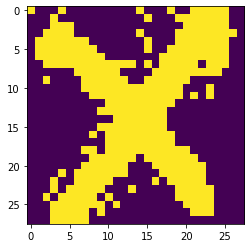

In [34]:
plt.imshow(data[value])

## Prepare data for training

In [35]:
data = np.array(data)

In [36]:
data.shape

(6759, 28, 28)

In [37]:
data = data.reshape(data.shape[0], data.shape[1] * data.shape[2])

In [70]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.1, random_state=25)

In [71]:
train_data.shape

(6083, 784)

In [100]:
model = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance')

In [101]:
#del model

## Train model

In [102]:
model.fit(train_data,train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [103]:
y_pred1 = model.predict(test_data)

## Check accuracy of model

In [104]:
print("Accuracy :{:.2f}".format(100*accuracy_score(test_labels, y_pred1)) + '%')

Accuracy :89.50%


In [105]:
print(classification_report(test_labels, y_pred1)) 

              precision    recall  f1-score   support

          65       0.98      0.96      0.97        47
          66       1.00      0.86      0.92        28
          67       0.91      1.00      0.95        29
          68       0.90      0.75      0.82        36
          69       0.89      0.77      0.83        22
          70       0.84      0.88      0.86        24
          71       0.95      0.90      0.92        20
          72       0.88      0.88      0.88        24
          73       1.00      0.88      0.93        16
          74       0.76      0.87      0.81        15
          75       0.90      0.78      0.84        23
          76       0.90      1.00      0.95        18
          77       0.97      0.97      0.97        33
          78       0.88      0.92      0.90        25
          79       0.70      0.94      0.80        32
          80       0.79      1.00      0.88        33
          81       0.94      0.65      0.77        23
          82       0.87    

## Save model

In [114]:
pickle.dump(model, open('finalized_model1.sav', 'wb'))

# Use model & test

## Load model

In [1]:
import pickle
import os
import cv2
import numpy as np

In [2]:
model = pickle.load(open('finalized_model1.sav', 'rb'))

## Load test image, Pre-processing & Predict

In [106]:
img = '1.jpg'

In [107]:
img = cv2.imread(img)
img = cv2.resize(img, (700, 700))

In [108]:
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [109]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow('image', gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [110]:
blur = cv2.GaussianBlur(gray,(5,5),0)
cv2.imshow('image', blur)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [111]:
im,thre = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
cv2.imshow('image', thre)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [112]:
contours, hierachy = cv2.findContours(thre,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
rects = [cv2.boundingRect(cnt) for cnt in contours]

In [113]:
for i in contours:
    (x,y,w,h) = cv2.boundingRect(i)
    if w>15 and h>15:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),1)
        roi= thre[y:y+h,x:x+w]
        roi = cv2.resize(roi,(28,28))
        #roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
        #cv2.imwrite(str(idx) + '.png', roi)
        #idx += 1
        roi = np.array(roi)
        roi = roi.reshape(-1,(28*28))
        pre = model.predict(roi)
        pre = chr(pre)
        cv2.putText(img, pre, (x , y),cv2.FONT_HERSHEY_DUPLEX,1,(255,0,0),1)
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [4]:
test_samples = 'test_samples'
images = []
result_path = 'results'
for i in os.listdir(test_samples):
    images.append(os.path.join(test_samples, i))

In [5]:
images[0].find('2')

13

In [7]:
for i in images:
    label = i[13]
    img = cv2.imread(i)
    # Pre-processing
    if img.shape[0] > 1000 or img.shape[1] > 1000:
        img = cv2.resize(img, (700,700))
    elif img.shape[0] < 300 or img.shape[1] < 300:
        img = cv2.resize(img, (700,700))
    cv2.imshow('image', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    cv2.imshow('image', gray)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    blur = cv2.GaussianBlur(gray,(5,5),0)
    cv2.imshow('image', blur)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    im,thre = cv2.threshold(gray,125,255,cv2.THRESH_BINARY_INV)
    cv2.imshow('image', thre)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    # find letters in images
    contours, hierachy = cv2.findContours(thre,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    rects = [cv2.boundingRect(cnt) for cnt in contours]
    # predict letters
    #idx = 0
    for i in contours:
        (x,y,w,h) = cv2.boundingRect(i)
        if w > 15 and h > 15:
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),1)
            new_img = gray[y:y+h,x:x+w]
            new_img = cv2.resize(new_img,(28,28))
            new_img = cv2.equalizeHist(new_img)
            im,thre1 = cv2.threshold(new_img,127,255,cv2.THRESH_BINARY_INV)
            #cv2.imwrite(str(idx) + '.png', new_img)
            #idx += 1
            np_img = np.array(thre1)
            np_img = np_img.reshape(-1,(28*28))
            pre = model.predict(np_img)
            pre = chr(pre)
            cv2.putText(img, pre, (x, y),cv2.FONT_HERSHEY_DUPLEX,1,(255,0,0),1)
    # show results
    cv2.imshow('image', img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    # save results
    cv2.imwrite(os.path.join(result_path, label + '.jpg'), img)